In [53]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn import linear_model

In [47]:
reviews_df = pd.read_csv("../1_collect_data/planet_terp_data/PT_review_data.csv")

nltk.download(["vader_lexicon"])

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AlexC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
reviews_df = reviews_df.dropna(subset = ['review'])

for index, row in reviews_df.iterrows():
   reviews_df.at[index, "sentiment"] = sia.polarity_scores(reviews_df.at[index, "review"])["compound"]

reviews_df

,name,slug,type,course,rating,review,date,sentiment
0,A Anthony,anthony,professor,AMST203,1.0,"By far the worst professor I’ve ever had, and ...",2018-08-17,-0.4939
1,A Kruglanski,kruglanski,professor,PSYC489H,2.0,"DO NOT TAKE PSYC489H ""Motivated Social Cogniti...",2015-09-07,-0.7021
2,A Sharma,sharma_a,professor,ASTR300,2.0,"Very boring, it's hard to maintain your focus ...",2019-04-04,-0.5034
3,A Sharma,sharma_a,professor,ASTR300,1.0,You'll pass but this class will be the most bo...,2019-05-26,-0.9000
4,A Sharma,sharma_a,professor,ASTR300,1.0,Rather difficult course. Class is extremely bo...,2019-12-08,-0.7089
...,...,...,...,...,...,...,...,...
19180,Zsuzsa Daczo,daczo,professor,SOCY105,5.0,Amazing professor. She genuinely cares about h...,2020-09-01,0.8750
19181,Zsuzsa Daczo,daczo,professor,SOCY105,3.0,I had Zsuzsa for SOCY105 online. Lectures were...,2021-01-12,0.9753
19182,Zsuzsa Daczo,daczo,professor,SOCY105,5.0,"Thoughtful, kind, and really funny. She talks ...",2021-01-22,0.9039
19183,Zubin Jelveh,jelveh,professor,CCJS418E,1.0,Possibly the most clueless professor regarding...,2022-04-07,0.4779


In [49]:
average_reviews_df = pd.DataFrame()
classes = {}
count = 0
curr_prof = reviews_df.at[0, "name"]
curr_slug = reviews_df.at[0, "slug"]
for index, row in reviews_df.iterrows():
    if reviews_df.at[index, "name"] == curr_prof:
        if reviews_df.at[index, "course"] in classes:
            classes[reviews_df.at[index, "course"]] = [classes.get(reviews_df.at[index, "course"])[0] + reviews_df.at[index, "rating"], 
                                                       classes.get(reviews_df.at[index, "course"])[1] + 1,
                                                       classes.get(reviews_df.at[index, "course"])[2] + reviews_df.at[index, "sentiment"]]
        else:
            classes[reviews_df.at[index, "course"]] = [reviews_df.at[index, "rating"],1,reviews_df.at[index, "sentiment"]]
    else:
        for i in classes.keys():
            average_reviews_df.at[count, "name"] = curr_prof
            average_reviews_df.at[count, "course"] = i
            average_reviews_df.at[count, "slug"] = curr_slug
            average_reviews_df.at[count, "average_rating"] = classes.get(i)[0]/classes.get(i)[1]
            average_reviews_df.at[count, "num_ratings"] = classes.get(i)[1]
            average_reviews_df.at[count, "average_sentiment"] = classes.get(i)[2]/classes.get(i)[1]
            count = count + 1
        classes = {}
        curr_prof = reviews_df.at[index, "name"]
        curr_slug = reviews_df.at[index, "slug"]

average_reviews_df

,name,course,slug,average_rating,num_ratings,average_sentiment
0,A Anthony,AMST203,anthony,1.000000,1.0,-0.493900
1,A Sharma,ASTR300,sharma_a,1.750000,4.0,-0.545675
2,A.U. Shankar,CMSC216,shankar_a.u.,2.222222,18.0,0.208872
3,A.U. Shankar,CMSC412,shankar_a.u.,3.200000,5.0,0.139580
4,Aaron Bartlett,ENGL265,bartlett,2.000000,3.0,0.171600
...,...,...,...,...,...,...
4169,Zita Nunes,AASP298L,nunes_zita,3.000000,1.0,0.458800
4170,Zita Nunes,ENGL234,nunes_zita,4.000000,2.0,0.730800
4171,Zoe Copeman,ARTH201,copeman_zoe,3.600000,5.0,0.494220
4172,Zohreh Davoudi,PHYS411,davoudi,1.666667,3.0,-0.287367


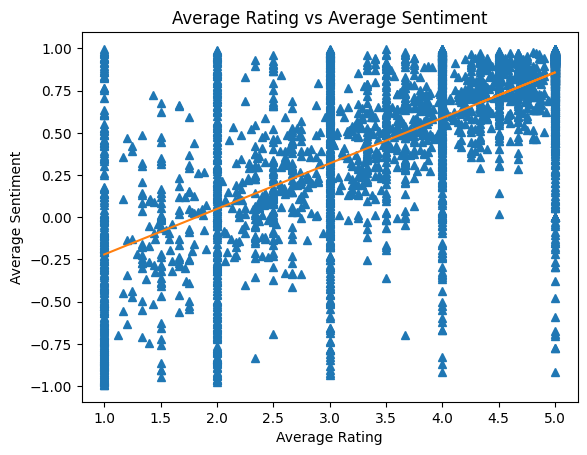

In [55]:
x = average_reviews_df["average_rating"]
y = average_reviews_df["average_sentiment"]
reg = linear_model.LinearRegression()
x_train = [[x] for x in average_reviews_df["average_rating"].values]
y_train = [[y] for y in average_reviews_df["average_sentiment"].values]
regfit = reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
plt.plot(x, y, "^")
plt.plot(x_train,y_pred)
plt.title("Average Rating vs Average Sentiment")
plt.ylabel("Average Sentiment")
plt.xlabel("Average Rating")
plt.show()

In [68]:
def combine(group):
     return pd.Series({
        'average_rating': sum(group['average_rating'].tolist())/len(group['average_rating'].tolist()),
        'num_ratings': sum(group['num_ratings'].tolist())/len(group['num_ratings'].tolist()),
        'average_sentiment': sum(group['average_sentiment'].tolist())/len(group['average_sentiment'].tolist())
    })

average_prof_df = average_reviews_df.groupby(['name']).apply(combine).reset_index()

average_prof_df["name"] = average_prof_df["name"].apply(lambda x: x.split()[0].upper()) + " " +average_prof_df["name"].apply(lambda x: x.split()[-1].upper())


average_prof_df

,name,average_rating,num_ratings,average_sentiment
0,A ANTHONY,1.000000,1.0,-0.493900
1,A SHARMA,1.750000,4.0,-0.545675
2,A.U. SHANKAR,2.711111,11.5,0.174226
3,AARON BARTLETT,2.000000,3.0,0.171600
4,AARON FINKLE,2.500000,8.0,0.229350
...,...,...,...,...
2142,ZHONGCHI LIU,4.714286,7.0,0.811586
2143,ZITA NUNES,3.500000,1.5,0.594800
2144,ZOE COPEMAN,3.600000,5.0,0.494220
2145,ZOHREH DAVOUDI,1.666667,3.0,-0.287367


In [76]:
combined_data_df = pd.read_csv("../2_clean_data/final_combine_data.csv")

combined_data_df = combined_data_df.drop(columns = ["course", "semester", "average_rating", "num_reviews", "average_gpa", 
                                                    "num_students", "years_taught", "departments", "real_name(s)", "_merge"])

for index, row in combined_data_df.iterrows():
    temp = combined_data_df.at[index, "salaries"][1:-1].split(", ")
    nums = [eval(i) for i in temp]
    combined_data_df.at[index, "average_salary"] = sum(nums)/len(nums)

combined_data_df = combined_data_df.drop(columns = ["salaries"])

combined_data_df

,name,average_salary
0,A SHARMA,86125.633000
1,AARON FINKLE,72452.691667
2,AARON HOOD,54602.026667
3,AARON SWANLEK,41046.400000
4,ABDIRISAK MOHAMED,17882.856667
...,...,...
2433,PARTHA LAHIRI,142902.577000
2434,RICHARD APTER,81207.935000
2435,RAYMOND SEDWICK,118712.219000
2436,SCOTT GILKESON,18666.666667


In [77]:
sal_sent_df = pd.merge(
    average_prof_df,
    combined_data_df,
    how = "inner",
    on = ["name"]
)

sal_sent_df

,name,average_rating,num_ratings,average_sentiment,average_salary
0,A SHARMA,1.750000,4.0,-0.545675,86125.633000
1,A.U. SHANKAR,2.711111,11.5,0.174226,123066.228000
2,AARON FINKLE,2.500000,8.0,0.229350,72452.691667
3,AARON HOOD,5.000000,2.0,0.924000,54602.026667
4,AARON SWANLEK,5.000000,7.0,0.921300,41046.400000
...,...,...,...,...,...
1797,ZHI LIN,3.750000,1.5,0.282050,10100.000000
1798,ZHONGCHI LIU,4.714286,7.0,0.811586,115001.797000
1799,ZITA NUNES,3.500000,1.5,0.594800,116293.453333
1800,ZOHREH DAVOUDI,1.666667,3.0,-0.287367,152548.832000


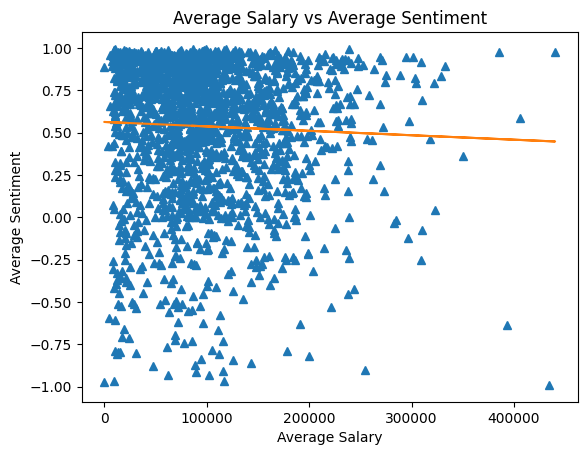

In [78]:
x = sal_sent_df["average_salary"]
y = sal_sent_df["average_sentiment"]
reg = linear_model.LinearRegression()
x_train = [[x] for x in sal_sent_df["average_salary"].values]
y_train = [[y] for y in sal_sent_df["average_sentiment"].values]
regfit = reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
plt.plot(x, y, "^")
plt.plot(x_train,y_pred)
plt.title("Average Salary vs Average Sentiment")
plt.ylabel("Average Sentiment")
plt.xlabel("Average Salary")
plt.show()